# <center>CO2 Emission Prediction</center>

In this project we will develop a model to predict the co2 emission from cars. We will develop 2 models and evaluate both of them and select the model based on the score. We will use **sklearn-LinearRegression** and **XGBOOST**. 

The data is a fuel consumption dataset, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

# Understanding Data

## FuelConsumption.csv

The dataset consists of the following features:

**- MODELYEAR**
<br>
**- MAKE**
<br>
**- MODEL**
<br>
**- VEHICLE CLASS**
<br>
**- ENGINE SIZE**
<br>
**- CYLINDERS**
<br>
**- TRANSMISSION**
<br>
**- FUELTYPE**
<br>
**- FUEL CONSUMPTION IN CITY**
<br>
**- FUEL CONSUMPTION IN HWY**
<br>
**- FUEL CONSUMPTION COMB**
<br>
**- CO2 EMISSIONS**

In [2]:
conda install -c anaconda wget

Solving environment: done

## Package Plan ##

  environment location: /Users/finneysunny/opt/anaconda3

  added / updated specs:
    - wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.8.28  |                0         133 KB  anaconda
    certifi-2019.9.11          |           py37_0         154 KB  anaconda
    conda-4.8.1                |           py37_0         3.0 MB  anaconda
    openssl-1.1.1d             |       h1de35cc_2         3.4 MB  anaconda
    wget-1.20.1                |       h051b688_0         478 KB  anaconda
    ------------------------------------------------------------
                                           Total:         7.2 MB

The following NEW packages will be INSTALLED:

  wget               anaconda/osx-64::wget-1.20.1-h051b688_0

The following packages will be UPDATED:

  conda                     conda-forge::conda-4.8.0-py37

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import sklearn as sk

In [9]:
from sklearn.model_selection import train_test_split

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-01-17 12:45:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

FuelConsumption.csv 100%[===================>]  70.93K   365KB/s    in 0.2s    

2020-01-17 12:45:41 (365 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [6]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Checking for Missing Values

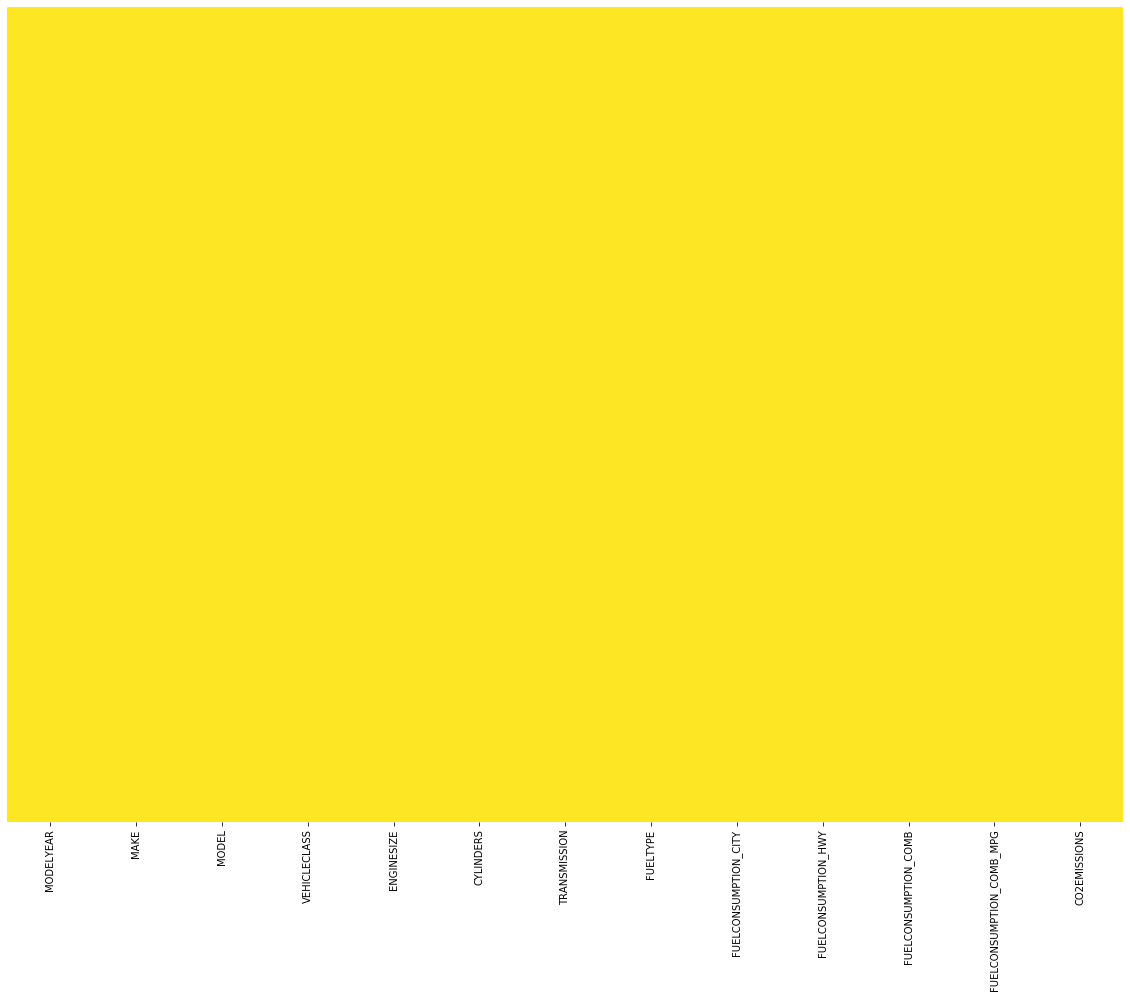

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis_r", cbar=False)

**There are no missing values in this data. So, lets proceed on with Data Analysis to see correlation of features.**

# Data Visualization & Analysis

In [19]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [20]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


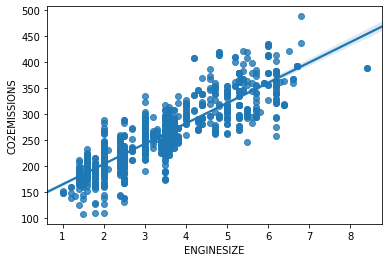

In [14]:
sns.regplot(df["ENGINESIZE"], df["CO2EMISSIONS"])

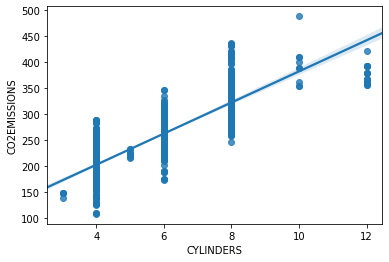

In [21]:
sns.regplot(df["CYLINDERS"], df["CO2EMISSIONS"])

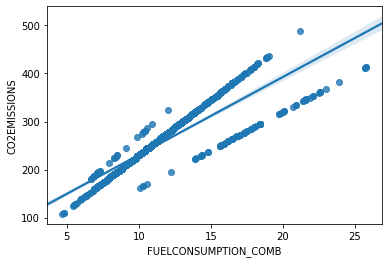

In [25]:
sns.regplot(df["FUELCONSUMPTION_COMB"], df["CO2EMISSIONS"])

In [30]:
features_df = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]]
print(features_df.shape)
features_df.head()

(1067, 3)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [33]:
co2emission = df[["CO2EMISSIONS"]]
print(co2emission.shape)
co2emission.head()

(1067, 1)


,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [36]:
x = np.asarray(features_df)
y = np.asarray(co2emission)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [42]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (746, 3)
X_test:  (321, 3)
y_train:  (746, 1)
y_test:  (321, 1)


# Model-1: Multiple Regression

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [44]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction

In [45]:
yhat1 = lm.predict(X_test)
yhat1

array([[185.8166566 ],
       [252.28321255],
       [255.56956003],
       [211.74300234],
       [248.62297737],
       [292.44953506],
       [346.6177541 ],
       [303.61245766],
       [257.56148094],
       [252.05071444],
       [242.14139094],
       [305.91853163],
       [190.86242688],
       [333.97818787],
       [208.08276716],
       [316.79867506],
       [312.59178871],
       [305.55409752],
       [383.24202621],
       [255.80205815],
       [221.01671496],
       [197.66761996],
       [231.09665311],
       [217.90098213],
       [203.82559975],
       [251.58571821],
       [178.45535877],
       [185.8166566 ],
       [199.42704275],
       [193.73405919],
       [203.82559975],
       [249.50268877],
       [179.89117492],
       [198.13261618],
       [224.13244779],
       [217.4359859 ],
       [247.00494416],
       [220.13700356],
       [307.49573737],
       [266.12609682],
       [303.4616145 ],
       [285.42946654],
       [209.98357954],
       [259

### Evaluation

In [46]:
from sklearn.metrics import r2_score

In [48]:
r2 = r2_score(y_test, yhat1)
r2

0.8796945821977584

# Model-2: XgBoost

In [49]:
from xgboost import XGBRegressor

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
regressor = XGBRegressor()

In [52]:
max_depth=[2,3,5,7, 10, 15]
learning_rate=[0.05, 0.1, 0.15, 0.2]
n_estimators=[100, 400, 500, 600, 900, 1100, 1400, 1500]
booster=['gbtree', 'gblinear']
min_child_weight=[1, 2, 3, 4]
base_score=[0.25, 0.5, 0.75, 1]

# setting Hyperparameters
hyperparameters_grid = {
    'max_depth' : max_depth, 
    'learning_rate' : learning_rate,
    'n_estimators' : n_estimators,
    'booster' : booster,
    'min_child_weight' : min_child_weight,
    'base_score' : base_score
}

In [57]:
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions= hyperparameters_grid,
                              n_iter = 50,
                              cv=5, n_jobs=4,
                              verbose= 5, return_train_score=True,
                              random_state=42,
                              scoring = 'neg_mean_absolute_error')

In [58]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   26.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   40.9s finished
/Users/finneysunny/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[14:21:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [59]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [61]:
regressor = XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [62]:
regressor.fit(X_train, y_train)

[14:25:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
yhat2 = regressor.predict(X_test)
yhat2

array([175.00623, 264.00995, 266.94586, 229.99527, 238.99991, 278.0241 ,
       346.94235, 325.44037, 278.04428, 257.9726 , 224.99788, 286.69705,
       182.01501, 366.0808 , 205.00067, 308.00735, 338.00302, 319.92014,
       344.00143, 302.3935 , 218.0337 , 193.00604, 280.35217, 246.00037,
       209.00124, 243.96196, 159.27884, 175.00623, 198.00069, 196.01431,
       209.00124, 242.02483, 166.00104, 206.9998 , 191.0439 , 231.9126 ,
       251.00522, 216.00269, 306.004  , 293.98285, 259.56885, 321.73892,
       225.00139, 262.0325 , 336.0175 , 300.16473, 264.31497, 235.0019 ,
       381.83594, 379.99374, 261.91962, 261.94064, 285.01364, 337.98907,
       190.90302, 178.99805, 198.00069, 193.68729, 294.34048, 237.0067 ,
       359.26352, 209.00124, 339.99478, 338.06067, 251.001  , 195.99243,
       381.99774, 220.9899 , 261.91962, 225.00139, 209.05688, 215.98294,
       316.99658, 252.99158, 368.0166 , 230.0028 , 338.00302, 228.82738,
       206.95598, 228.82738, 196.00206, 180.02869, 

## Evaluation

In [64]:
r2_1 = r2_score(y_test, yhat2)
r2_1

0.9500669076452062

# Result

As per the evaluation results, we can come to a conclusion that in this project Model 2 is better.